In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import textwrap
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

import plotting

%load_ext autoreload
%autoreload 2
hs_dict = plotting.get_core_dict()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x600 with 0 Axes>

In [2]:
gdf = gpd.read_file('data/usastate/tl_2020_us_state.shp')

In [3]:
gdf = gdf[gdf['STUSPS'].isin(['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA','WY'])]

In [4]:
len(gdf)

11

In [5]:
data = gpd.read_file("outputs/d2-events-2d-230929_SVI_shapefile.geojson")

In [6]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample DataFrame with 'year' column added
# data = {
#     'state': ['A', 'B', 'C', 'D', 'E', 'F', 'G'] * 40,  # Multiple states
#     'geoid': list(range(1, 21)) * 14,  # Repeat geoids for simplicity
#     'exposure': np.random.randint(100, 500, 280),  # Random exposure values
#     'year': [year for year in range(2000, 2020) for _ in range(14)]  # Years from 2000 to 2019
# }
# df = pd.DataFrame(data)

# # Assuming you want to focus on a subset of years for clarity, e.g., 2015-2019
# df_filtered = df[df['year'].between(2015, 2019)]

# # Aggregate or Filter Top 50 geoid by Exposure in Each State for Each Year
# top_geoid_per_state_year = df_filtered.groupby(['state', 'year']).apply(lambda x: x.nlargest(50, 'exposure')).reset_index(drop=True)

# # Identify the 5 States for Plotting (top 5 states by total exposure over the selected years)
# top_states = top_geoid_per_state_year.groupby('state')['exposure'].sum().nlargest(5).index

# # Create Stacked Bar Chart for Each State
# fig, axes = plt.subplots(nrows=len(top_states), ncols=1, figsize=(12, 6 * len(top_states)))

# # if len(top_states) == 1:  # If there's only one top state, make axes an array
# #     axes = [axes]

# for i, state in enumerate(top_states):
#     state_data = top_geoid_per_state_year[top_geoid_per_state_year['state'] == state]
#     for year in sorted(state_data['year'].unique()):
#         year_data = state_data[state_data['year'] == year]
#         bottom_data = state_data[state_data['year'] < year].groupby('geoid')['exposure'].sum()  # Data for stacking
#         axes[i].bar(year_data['geoid'].astype(str), year_data['exposure'], bottom=bottom_data, label=str(year))
    
# #     axes[i].set_title(f'Exposure by GEOID within State {state} (2015-2019)')
# #     axes[i].set_xlabel('GEOID')
# #     axes[i].set_ylabel('Exposure')
# #     axes[i].legend(title="Year")

# plt.tight_layout()
# plt.show()


In [7]:
hspts = plotting.get_hotspot_list()

# Publication Type Figures

In [8]:
from matplotlib import rcParams
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Myriad Pro'] 
sns.set_style("whitegrid")

In [9]:
hs_dict.keys()

dict_keys(['wfday', 'heatday', 'smoke_pm_non_zero', 'hws', 'hs', 'hw', 'ws'])

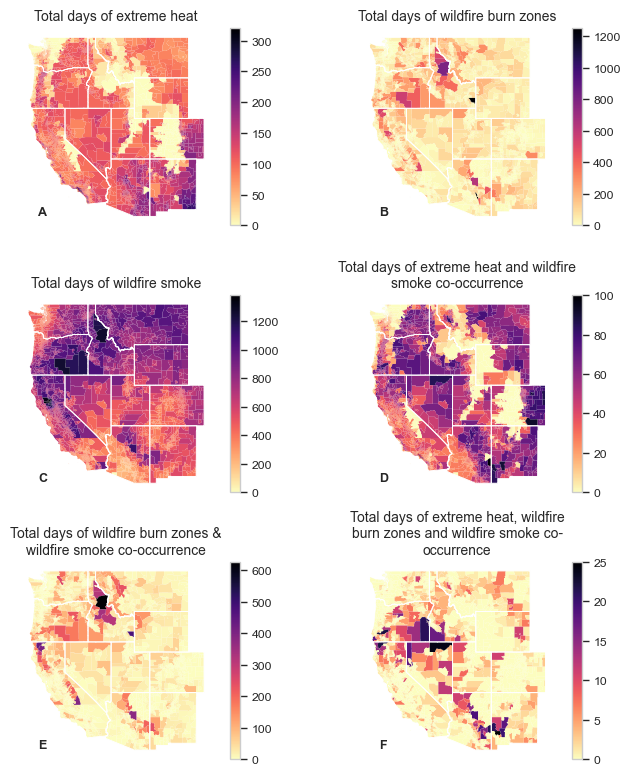

In [22]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(3, 2, figsize=(7.25, 7.8))  # 2 columns wide, max depth of 7.8 inches

columns=[ 'heatday', 'wfday','smoke_pm_non_zero','hs', 'ws','hws',]
labels = ['A', 'B', 'C', 'D', 'E', 'F']

for i in range(3):
    for j in range(2):
        ax = axs[i, j]
        col = columns[i * 2 + j]
        if col == "wfday":
            norm = mcolors.Normalize(vmin=data['wfday'].min(), vmax=1250)
        else:
            norm = None
        data.plot(
            column=col, ax=ax, legend=True, linewidth=0, cmap="magma_r", 
            missing_kwds={"color": "lightgrey"}, norm=norm
        )
        gdf.boundary.plot(ax=ax, linewidth=0.7, color="white")

        wrapped_title = textwrap.fill(hs_dict[col]["title_map"], 40) 
        ax.set_title(wrapped_title, fontsize=10)
        ax.set_axis_off()

        ax.text(
            0.1, 0.1, labels[i * 2 + j], transform=ax.transAxes, 
            fontsize=9, fontweight='bold', ha='left', va='top', 
            fontfamily='sans-serif'
        )

plt.tight_layout()  
plt.savefig('figures/pdf/fig1.pdf', format='pdf')

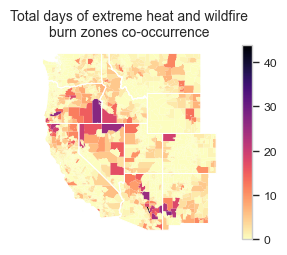

In [20]:
fig, ax = plt.subplots(figsize=(3.7, 2.6))  # 2 columns wide, max depth of 7.8 inches

col='hw'

norm = None
data.plot(
    column=col, ax=ax, legend=True, linewidth=0, cmap="magma_r", 
    missing_kwds={"color": "lightgrey"}, norm=norm
)
gdf.boundary.plot(ax=ax, linewidth=0.7, color="white")

wrapped_title = textwrap.fill(hs_dict[col]["title_map"], 40) 
ax.set_title(wrapped_title, fontsize=10)
ax.set_axis_off()
       
# Adjust layout
plt.tight_layout()
plt.savefig('figures/pdf/s1.pdf', format='pdf')

In [27]:
gdf = gpd.read_file('data/WesternUSCensusTract/CensusTract2020_WesternUS.shp')
# data = gdf.merge(data[["FIPS","smoke_pm_non_zero"]], on="FIPS")
data = gdf.merge(data[["FIPS","smoke_pm_gt_five"]], on="FIPS")

In [41]:
hs_dict = plotting.get_hotspopt_dict()

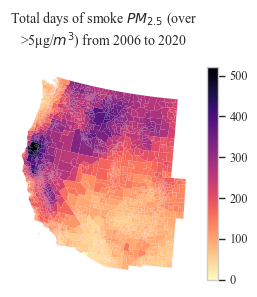

In [42]:
norm = None
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
#x = "smoke_pm_non_zero"
# x = "smoke_"
x = "smoke_pm_gt_five"
data.plot(
    column=x, ax=ax, legend=True, linewidth=0, cmap="magma_r", missing_kwds={"color": "lightgrey"}, norm = norm
    )

wrapped_title = textwrap.fill(hs_dict[x]["title_map"]+" from 2006 to 2020", 40) # " "
ax.set_title(wrapped_title, fontsize=10)
ax.set_axis_off()

plt.tight_layout()
plt.savefig("figures/centract_hotspots_wc_" + hs_dict[x]["title"] + "231003-.png", dpi=300, bbox_inches='tight')
plt.show()

In [26]:
varsdict = {
    "EP_POV150": "Persons below 150% poverty estimate (%)",
    "EP_UNEMP": "Civilian (16+) unemployed estimate (%)",
    "EP_AGE65": "Persons aged 65 or older (%)",
    "EP_AFAM": "Black African-American",
}
pallete = {
    "EP_POV150": "pink_r",
    "EP_UNEMP": "summer_r",
    "EP_AGE65": "winter_r",
    "EP_AFAM": "cool",
} 

In [29]:
data = data[data["EP_UNEMP"]>0]

/tmp/ipykernel_37938/4254666721.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


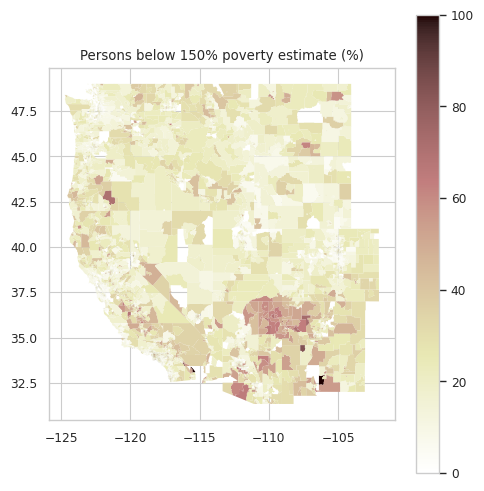

/tmp/ipykernel_37938/4254666721.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


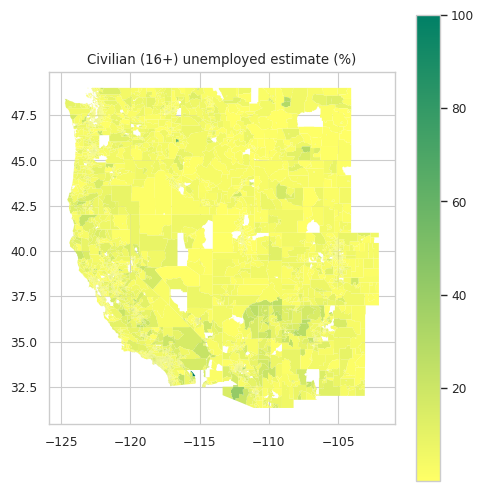

/tmp/ipykernel_37938/4254666721.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


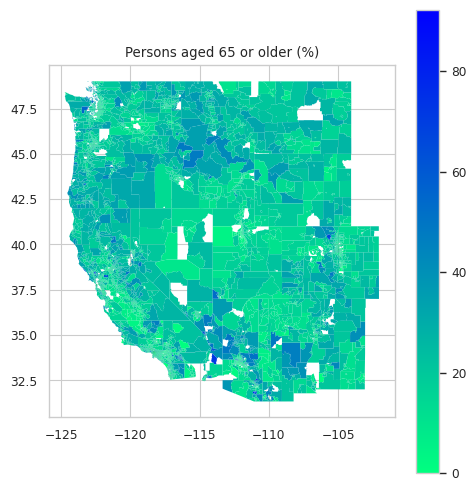

/tmp/ipykernel_37938/4254666721.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


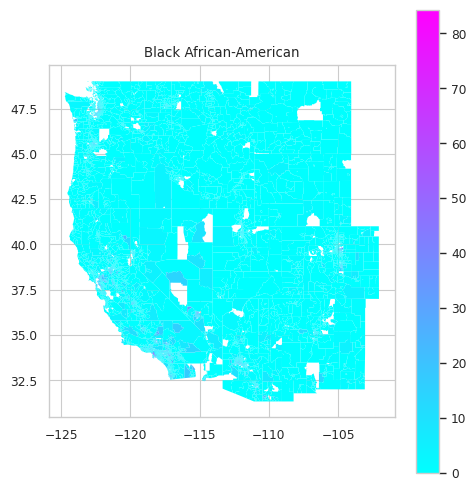

In [30]:
for var in varsdict.keys():
    # Plot the map with a specified column and color palette
    ax = data.plot(
        column=var, cmap=pallete[var], figsize=(5, 5), linewidth=0, edgecolor="black"
    )

    # Add a color bar to the plot
    sm = plt.cm.ScalarMappable(
        cmap=pallete[var], norm=plt.Normalize(vmin=data[var].min(), vmax=data[var].max())
    )
    sm.var = []
    cbar = plt.colorbar(sm)
    plt.title(varsdict[var])
    plt.tight_layout()
    plt.savefig(varsdict[var])
    plt.show()